In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/My Drive/Datasets')
os.listdir('.')

['bottle.csv',
 'iris.csv',
 'heart.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'housing.csv',
 'auto.csv',
 'winequality-white.csv']

In [113]:
dataset = pd.read_csv('winequality-white.csv', sep=';')
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [115]:
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


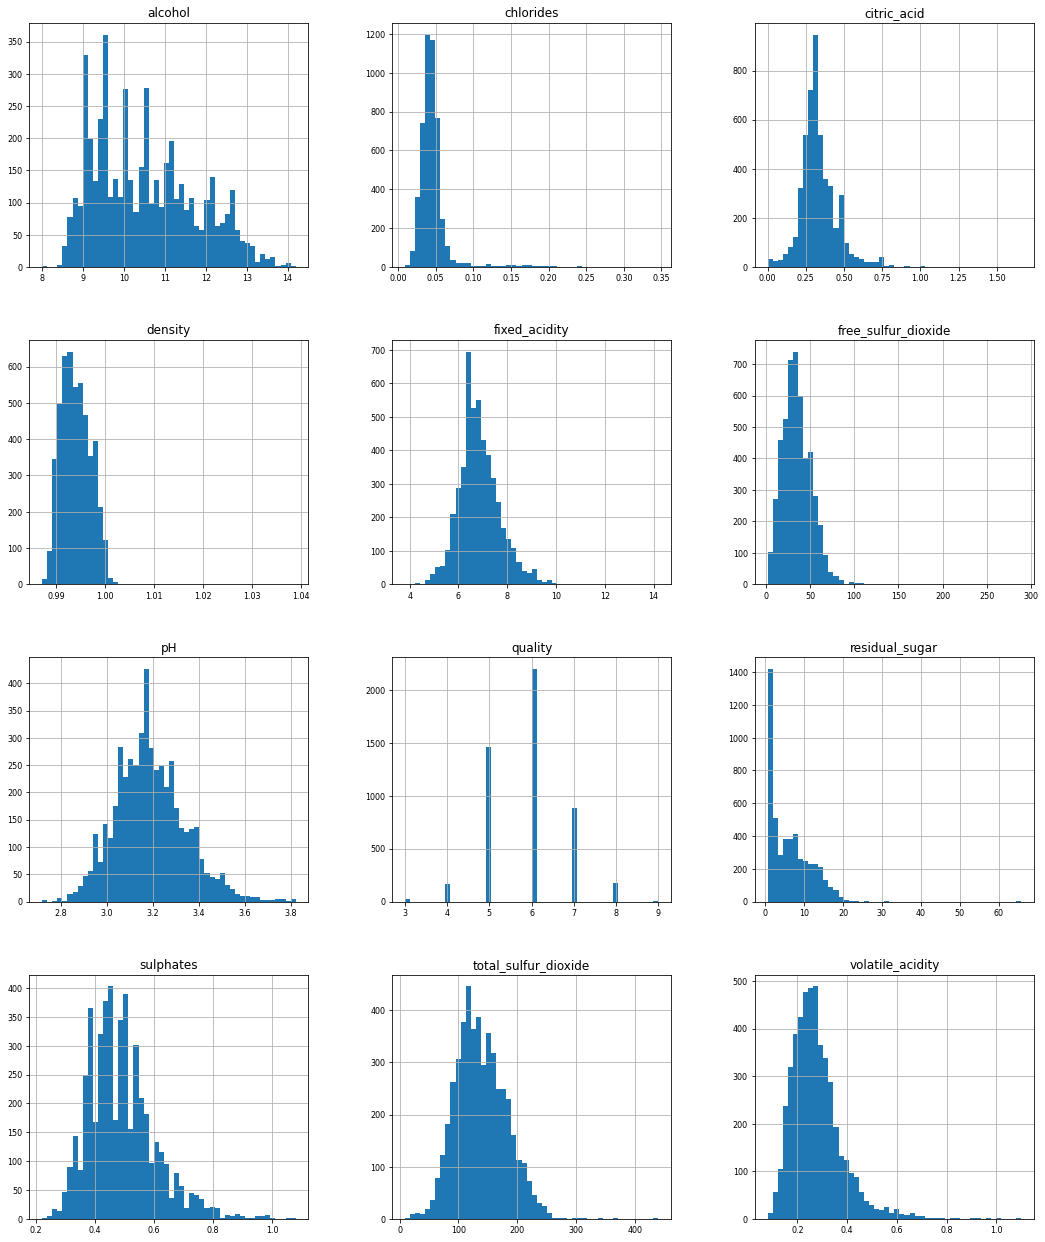

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

<Figure size 1440x864 with 0 Axes>

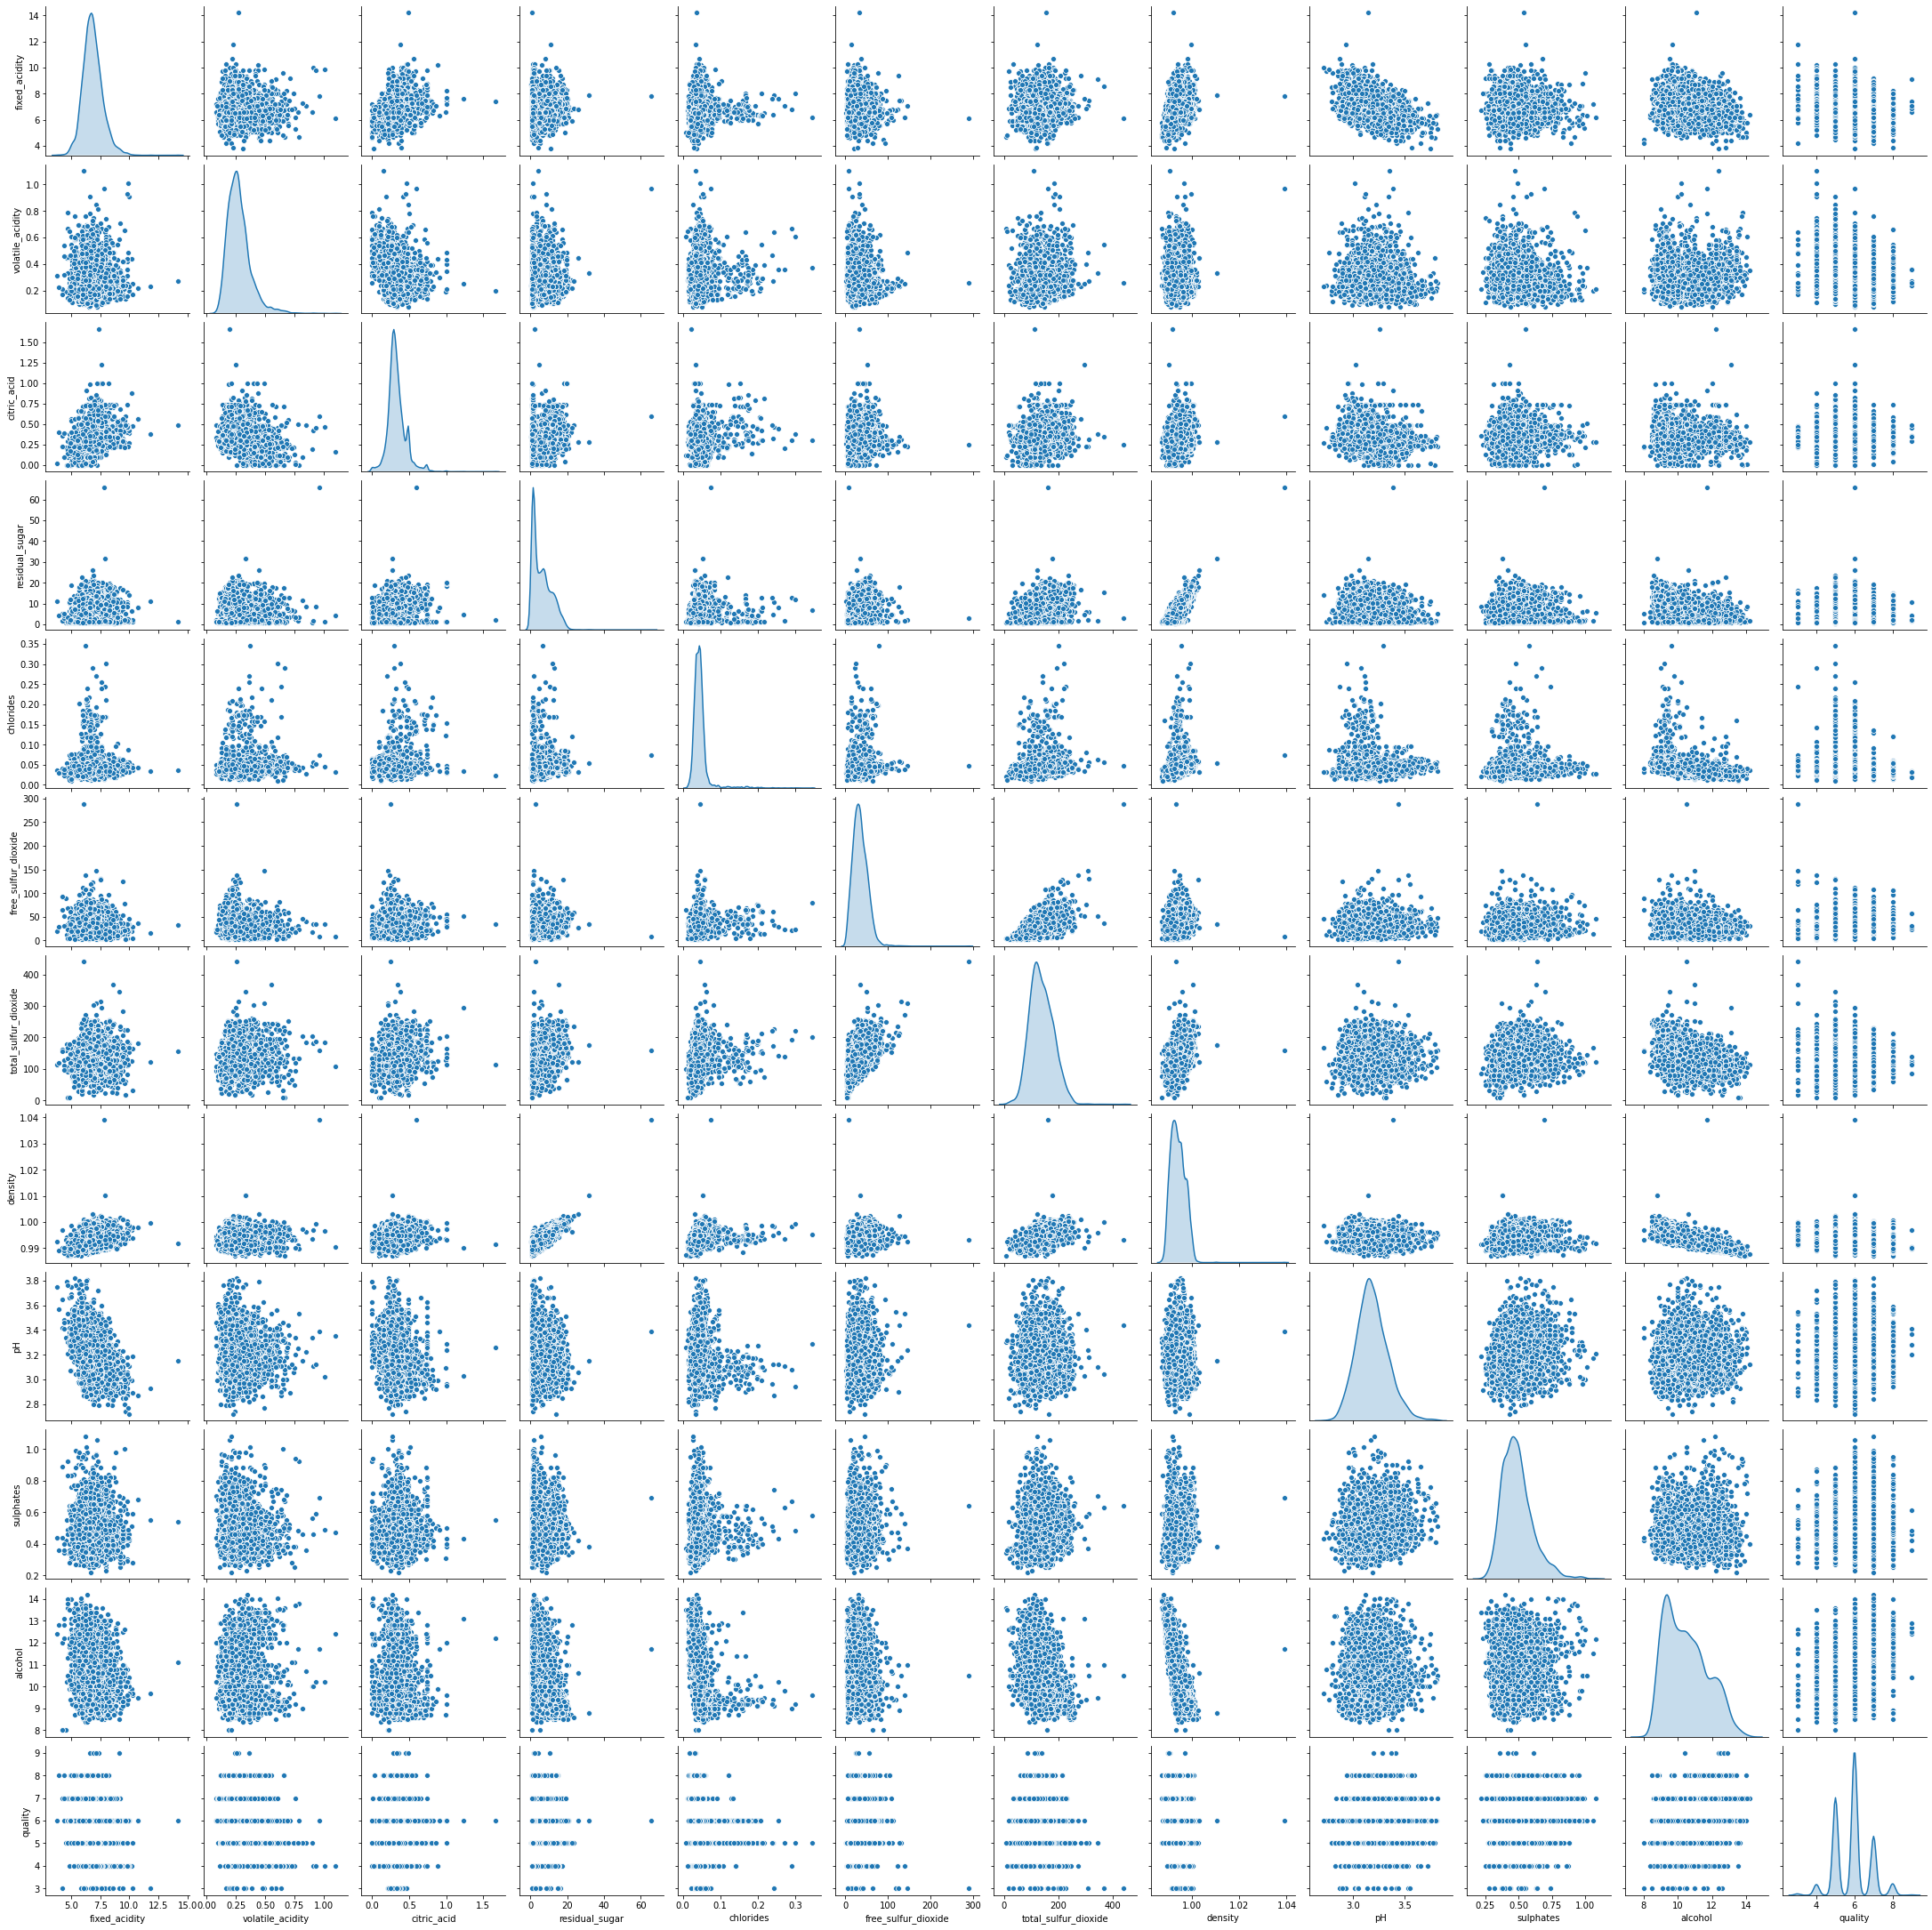

In [ ]:
plt.figure(figsize=(20,12))
sb.pairplot(dataset, diag_kind='kde')
plt.show()

In [116]:
# membuat list nama kolom feature
col_feature = dataset.columns[:-1]

# menampilkan data bernilai nol (kosong)
for nama in col_feature:
  print(f'kolom - {nama} - yang berisi nol sebanyak : {len(dataset[dataset[nama] == 0])}')

kolom - fixed_acidity - yang berisi nol sebanyak : 0
kolom - volatile_acidity - yang berisi nol sebanyak : 0
kolom - citric_acid - yang berisi nol sebanyak : 19
kolom - residual_sugar - yang berisi nol sebanyak : 0
kolom - chlorides - yang berisi nol sebanyak : 0
kolom - free_sulfur_dioxide - yang berisi nol sebanyak : 0
kolom - total_sulfur_dioxide - yang berisi nol sebanyak : 0
kolom - density - yang berisi nol sebanyak : 0
kolom - pH - yang berisi nol sebanyak : 0
kolom - sulphates - yang berisi nol sebanyak : 0
kolom - alcohol - yang berisi nol sebanyak : 0


In [117]:
dataset.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [118]:
dataset[dataset['citric_acid'] == 0]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
115,5.5,0.485,0.0,1.5,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,4
300,6.1,0.410,0.0,1.6,0.063,36.0,87.0,0.99140,3.27,0.67,10.8,6
302,6.1,0.410,0.0,1.6,0.063,36.0,87.0,0.99140,3.27,0.67,10.8,6
780,6.0,0.395,0.0,1.4,0.042,7.0,55.0,0.99135,3.37,0.38,11.2,4
862,4.8,0.340,0.0,6.5,0.028,33.0,163.0,0.99390,3.36,0.61,9.9,6
864,4.8,0.330,0.0,6.5,0.028,34.0,163.0,0.99370,3.35,0.61,9.9,5
890,5.0,0.310,0.0,6.4,0.046,43.0,166.0,0.99400,3.30,0.63,9.9,6
1152,6.1,0.600,0.0,1.3,0.042,24.0,79.0,0.99370,3.31,0.38,9.4,4
1817,7.2,0.500,0.0,0.8,0.034,46.0,114.0,0.99320,3.19,0.34,9.2,4
2321,4.6,0.445,0.0,1.4,0.053,11.0,178.0,0.99426,3.79,0.55,10.2,5


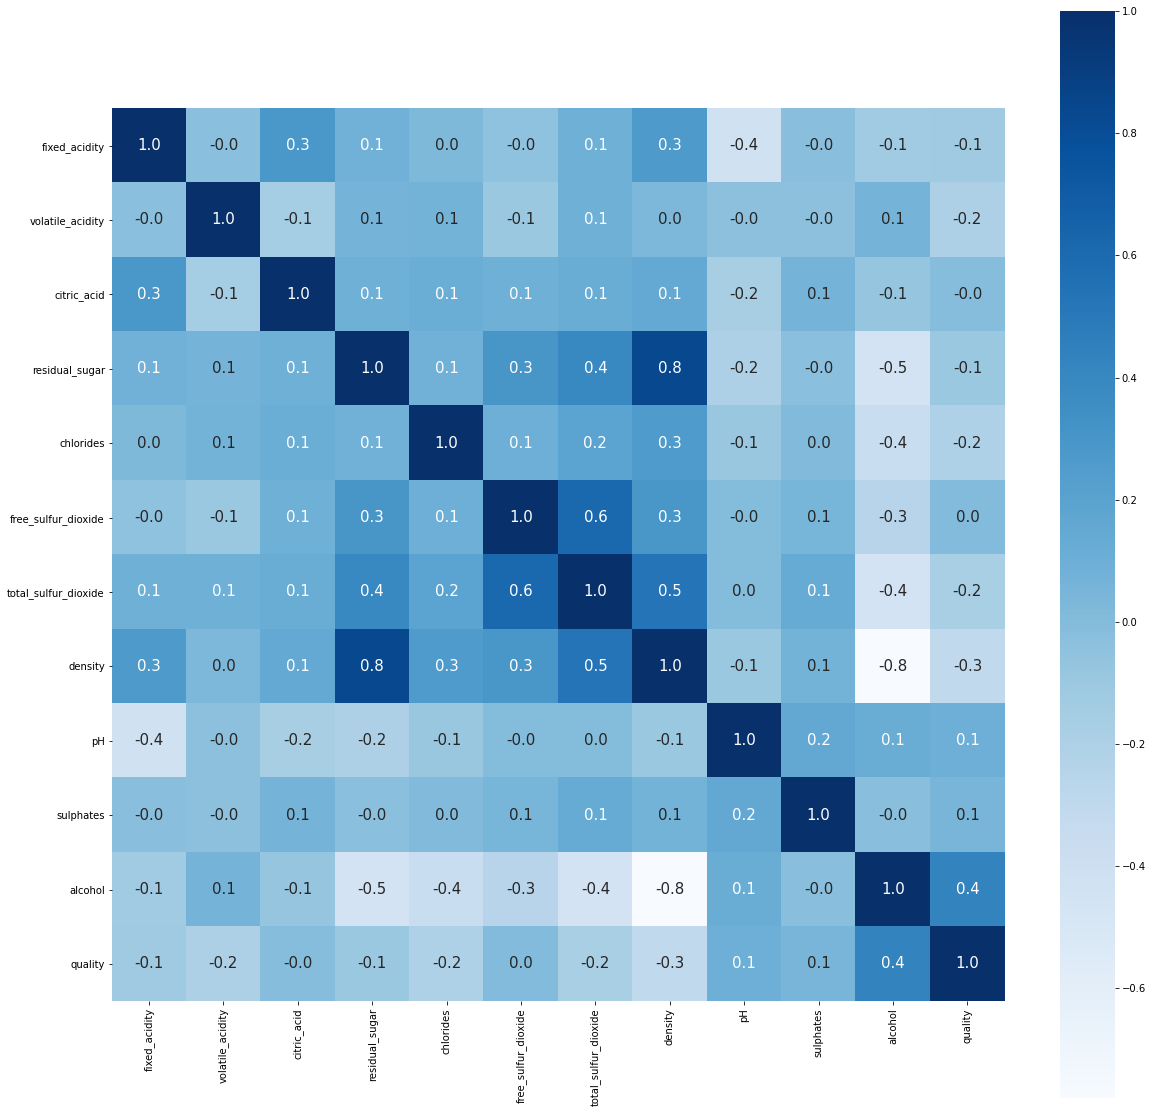

In [ ]:
# memvisualisasikan korelasi data
corr = dataset.corr()

plt.figure(figsize=(20,20))
sb.heatmap(corr, annot=True, cbar=True, square= True, fmt='.1f', annot_kws={'size':15}, cmap='Blues')
plt.show()

In [119]:
# membagi data feature dan label
feature = dataset.drop(['quality'], axis=1)
label = dataset['quality']

# Assignment 8

**Untuk dataset**: Boston Housing, Wine Quality, & Automobile

1. Lakukan preprocessing terhadap data menggunakan:
  - StandardScaler
  - Yeo-Johnson (PowerTransformer)
  - Box-Cox Transformation (PowerTransformer)
  - QuantileTransformer
  - MinMaxScaler
  - MaxAbsScaler
  - RobustScaler

  Dan jelaskan apabila hasil training untuk algoritma LinearRegression untuk masing-masing metode transformasi data dibandingkan!

  Jelaskan juga apabila terdapat metode preprocessing yang tidak dapat digunakan untuk salah satu dataset!

  **Catatan**: Ratio training set: testing set = 75:25, dengan random_state=10

2. Gunakan algoritma berikut dan lakukan percobaan hyperparameter tuning untuk mendapatkan hasil terbaik:
  - Random Forest Regressor
  - XGBoost
  - SVM Regressor
  - KNN Regressor

  Hitung angka r^2 serta RMSE untuk menentukan mana algoritma yang paling baik!

  **Catatan**: Ratio training set: testing set = 75:25, dengan random_state=10

# Jawaban No. 1

## Preprocessing

In [ ]:
# melakukan scalling dan membagi feture dan label
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

standard_scaler = preprocessing.StandardScaler() 
power_transformer_yj = preprocessing.PowerTransformer(method='yeo-johnson') 
power_transformer_bc = preprocessing.PowerTransformer(method='box-cox')
quantile_transformer = preprocessing.QuantileTransformer()
min_max_scaler = preprocessing.MinMaxScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
robust_scaler = preprocessing.RobustScaler()

scalling =[standard_scaler, power_transformer_yj, power_transformer_bc,
           quantile_transformer, min_max_scaler, max_abs_scaler, robust_scaler]

feature_train = []
feature_test = []
label_train = []
label_test = []

for scaler in scalling:
  try:
    feature_scaled = scaler.fit_transform(feature.values)
    label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()
    x_train, x_test, y_train, y_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)
    feature_train.append(x_train)
    feature_test.append(x_test)
    label_train.append(y_train)
    label_test.append(y_test)

  except:
    # melihat scalling yang tidak dapat digunakan
    print('Error terjadi pada: ', scaler)
    print('Karene tidak dapat mengoleh data yang bernilai minus')
    print('\n')
    pass

Error terjadi pada:  PowerTransformer(copy=True, method='box-cox', standardize=True)
Karene tidak dapat mengoleh data yang bernilai minus




## Melatih Model dan Evaluasi

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr_model = LinearRegression()

# list scalling yang bisa digunakan
scalling_use =['standard_scaler', 'power_transformer_yj', 'quantile_transformer', 
           'min_max_scaler', 'max_abs_scaler', 'robust_scaler']

for i in range(6):  
  lr_model.fit(feature_train[i], label_train[i])

  # prediksi
  feature_train_pred = lr_model.predict(feature_train[i])
  feature_test_pred = lr_model.predict(feature_test[i])

  # evaluasi
  score_x = r2_score(label_train[i], feature_train_pred)
  score_y = r2_score(label_test[i], feature_test_pred)
  rmse_x = np.sqrt(mean_squared_error(label_train[i], feature_train_pred))
  rmse_y = np.sqrt(mean_squared_error(label_test[i], feature_test_pred))


  print('Berikut hasil evaluasi dengan scalling: ', scalling_use[i])
  print('- Nilai r2_score train \t:', round(score_x, 2))
  print('- Nilai r2_score test \t:', round(score_y, 2))
  print('- Nilai RMSE train \t:', round(rmse_x, 2))
  print('- Nilai RMSE test \t:', round(rmse_y, 2))
  print('\n')

Berikut hasil evaluasi dengan scalling:  standard_scaler
- Nilai r2_score train 	: 0.28
- Nilai r2_score test 	: 0.29
- Nilai RMSE train 	: 0.85
- Nilai RMSE test 	: 0.84


Berikut hasil evaluasi dengan scalling:  power_transformer_yj
- Nilai r2_score train 	: 0.28
- Nilai r2_score test 	: 0.29
- Nilai RMSE train 	: 0.85
- Nilai RMSE test 	: 0.84


Berikut hasil evaluasi dengan scalling:  quantile_transformer
- Nilai r2_score train 	: 0.32
- Nilai r2_score test 	: 0.32
- Nilai RMSE train 	: 0.22
- Nilai RMSE test 	: 0.22


Berikut hasil evaluasi dengan scalling:  min_max_scaler
- Nilai r2_score train 	: 0.28
- Nilai r2_score test 	: 0.29
- Nilai RMSE train 	: 0.13
- Nilai RMSE test 	: 0.12


Berikut hasil evaluasi dengan scalling:  max_abs_scaler
- Nilai r2_score train 	: 0.28
- Nilai r2_score test 	: 0.29
- Nilai RMSE train 	: 0.08
- Nilai RMSE test 	: 0.08


Berikut hasil evaluasi dengan scalling:  robust_scaler
- Nilai r2_score train 	: 0.28
- Nilai r2_score test 	: 0.29
- Nilai RMS

## Kesimpulan:
- Ada satu tipe scalling yang tidak dapat digunakan yaitu **PowerTransformer(method=box-cox)** karena jenis ini tidak dapat mengolah data yang ada bernilai minus atau nol dan hanya bekerja dengan nilai-nilai yang sangat positif. Sedangkan pada data housing ini memiliki nilai nol pada kolom *citric_acid* sehingga scalling ini tidak dapat digunakan.
- Dengan menggunakan algoritma LinearRegression dengan berbagai type scalling yang digunakan dapat diketahui bahwa dengan tipe scalling **QuantileTransformer** yang memiliki nilai r2_score yang tinggi antara data train dan data testnya (r2_score train = 0.32 dan r2_score test = 0.32) serta memiliki nilai RMSE yang termasuk rendah juga (RMSE train = 0.22 dan RMSE test = 0.22)
- Dari sini dapat dilihat bahwa model algoritma ini kurang cocok digunakan karena keseluruhan hasil r2_score bernilai rendah meskipun telah dilakukan preprocessing dengan berbagai type dan kualitas nya juga underfitting.

# Jawaban No. 2

## Preprocessing

## RandomForestRegressor dengan Scalling Quantile Transformer

In [ ]:
# melakukan preprocessing dan pembagian data train dan test
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

# scalling
scaler = QuantileTransformer()
feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

# membagi data train dan test
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=10)
rfr_model.fit(feature_train, label_train)

# prediksi
train_pred = rfr_model.predict(feature_train)
test_pred = rfr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 0.75
- Nilai r2_score test 	: 0.51
- Nilai RMSE train 	: 0.14
- Nilai RMSE test 	: 0.19


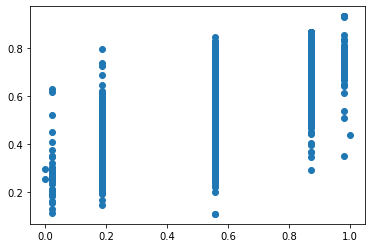

In [ ]:
plt.scatter(label_test, test_pred)
plt.show()

## XGBoost dengan Scalling Quantile Transformer

In [ ]:
# melatih dataset dengan algoritma xgboost
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
xgbr_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, eta=0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 5, n_estimators = 500)
xgbr_model.fit(feature_train, label_train)

# prediksi
train_pred = xgbr_model.predict(feature_train)
test_pred = xgbr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 0.93
- Nilai r2_score test 	: 0.52
- Nilai RMSE train 	: 0.07
- Nilai RMSE test 	: 0.19


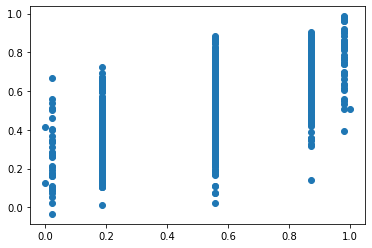

In [ ]:
plt.scatter(label_test, test_pred)
plt.show()

## SVM Regressor dengan Scalling Quantile Transformer

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', gamma='scale', C=10)
svr_model.fit(feature_train, label_train)

# prediksi
train_pred = svr_model.predict(feature_train)
test_pred = svr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 0.76
- Nilai r2_score test 	: 0.39
- Nilai RMSE train 	: 0.13
- Nilai RMSE test 	: 0.21


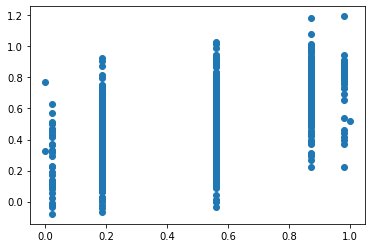

In [ ]:
plt.scatter(label_test, test_pred)
plt.show()

## KNN Regressor dengan Scalling Quantile Transformer

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')
knn_model.fit(feature_train, label_train)

# prediksi
train_pred = knn_model.predict(feature_train)
test_pred = knn_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 0.49
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.19


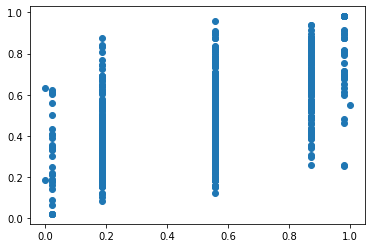

In [ ]:
plt.scatter(label_test, test_pred)
plt.show()

## Kesimpulan:
- Algoritma diatas sudah saya pilih yang terbaik dari tuning parameternya.
- Pada tahap preprocesing saya menggunakan scalling QuantileTransformer karena memiliki nilai r2_score yng lebih baik dibanding yang lain.
- Dari keempat algoritma yang diterapkan, berdasarkan hasil evaluasi yang saya lakukan maka algoritma termasuk hasilnya lumayan bagus yaitu *Random Forest Regressor* karena hasil r2_score data training (0.75) dan data testing (0.51) dengan variance (0.24) kemudian diikuti algoritme *XGBoost Regressor* dengan hasil r2_score data training (0.93) dan data testing (0.52) dengan variance (0.41).
- Dari keseluruhan algoritma yang diterapkan menghasilkan kualitas model yang underfitting dengan variance yang lumayan besar (rata2 0.2-03)
- Dari EDA sampai proses evaluasi model dapat disimpulkan bahwa korelasi antara variable tidak terlalu kuat dengan rata2 nilai dibawah 0.5 sehingga memungkinkan hasil pemodelan regressi yang kurang optimal.
- Kemudian nilai label yang digunakan (quality) merupakan nilai kategori, sehingga lebih sebaik dicoba untuk dimodelkan secara klasifikasi.


# MENGGUNAKAN CLASSIFICATION

In [129]:
# melakukan scalling dan membagi feture dan label
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

standard_scaler = preprocessing.StandardScaler() 
power_transformer_yj = preprocessing.PowerTransformer(method='yeo-johnson') 
power_transformer_bc = preprocessing.PowerTransformer(method='box-cox')
quantile_transformer = preprocessing.QuantileTransformer()
min_max_scaler = preprocessing.MinMaxScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
robust_scaler = preprocessing.RobustScaler()

scalling =[standard_scaler, power_transformer_yj, power_transformer_bc,
           quantile_transformer, min_max_scaler, max_abs_scaler, robust_scaler]

feature_train = []
feature_test = []
label_train = []
label_test = []

for scaler in scalling:
  try:
    feature_scaled = scaler.fit_transform(feature.values)
    x_train, x_test, y_train, y_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)
    feature_train.append(x_train)
    feature_test.append(x_test)
    label_train.append(y_train)
    label_test.append(y_test)

  except:
    # melihat scalling yang tidak dapat digunakan
    print('Error terjadi pada: ', scaler)
    print('Karene tidak dapat mengoleh data yang bernilai minus')
    print('\n')
    pass

Error terjadi pada:  PowerTransformer(copy=True, method='box-cox', standardize=True)
Karene tidak dapat mengoleh data yang bernilai minus




In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
tree_model = DecisionTreeClassifier()

# list scalling yang bisa digunakan
scalling_use =['standard_scaler', 'power_transformer_yj', 'quantile_transformer', 
           'min_max_scaler', 'max_abs_scaler', 'robust_scaler']

for i in range(6):  
  tree_model.fit(feature_train[i], label_train[i])

  # prediksi
  feature_train_pred = tree_model.predict(feature_train[i])
  feature_test_pred = tree_model.predict(feature_test[i])

  # evaluasi
  score = tree_model.score(feature_test[i], label_test[i])
  print('Berikut hasil evaluasi dengan scalling: ', scalling_use[i])
  print('Nilai Score data Test: ', score)
  print('\n')

Berikut hasil evaluasi dengan scalling:  standard_scaler
Nilai Score data Test:  0.6057142857142858


Berikut hasil evaluasi dengan scalling:  power_transformer_yj
Nilai Score data Test:  0.6089795918367347


Berikut hasil evaluasi dengan scalling:  quantile_transformer
Nilai Score data Test:  0.6065306122448979


Berikut hasil evaluasi dengan scalling:  min_max_scaler
Nilai Score data Test:  0.6122448979591837


Berikut hasil evaluasi dengan scalling:  max_abs_scaler
Nilai Score data Test:  0.6163265306122448


Berikut hasil evaluasi dengan scalling:  robust_scaler
Nilai Score data Test:  0.6057142857142858




In [132]:
# melakukan preprocessing dan pembagian data train dan test
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# scalling
scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(feature.values)

# membagi data train dan test
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=10)

## Decision Tree Classifier

In [133]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(feature_train, label_train)

# membuat prediksi data feature test
feature_pred = tree_model.predict(feature_test)


score = tree_model.score(feature_test, label_test)
print('Nilai Score data Test: ', score)

Nilai Score data Test:  0.6146938775510205


In [134]:
from sklearn.metrics import classification_report
report_tree = classification_report(label_test, feature_pred)
print(report_tree)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.32      0.28        34
           5       0.67      0.63      0.65       374
           6       0.65      0.67      0.66       539
           7       0.56      0.52      0.54       223
           8       0.52      0.52      0.52        52
           9       0.00      0.00      0.00         1

    accuracy                           0.61      1225
   macro avg       0.38      0.38      0.38      1225
weighted avg       0.62      0.61      0.62      1225



## SVC

In [137]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=5000, gamma='scale')
svc_model.fit(feature_train, label_train)

# membuat prediksi data feature test
feature_pred = svc_model.predict(feature_test)

score = svc_model.score(feature_test, label_test)
print('Nilai Score data Test: ', score)

Nilai Score data Test:  0.5738775510204082


In [138]:
from sklearn.metrics import classification_report
report_svc = classification_report(label_test, feature_pred)
print(report_svc)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.18      0.35      0.24        34
           5       0.59      0.59      0.59       374
           6       0.62      0.62      0.62       539
           7       0.59      0.51      0.54       223
           8       0.49      0.44      0.46        52
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1225
   macro avg       0.35      0.36      0.35      1225
weighted avg       0.59      0.57      0.58      1225



## Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=1000, max_depth=55, criterion='gini', max_features='sqrt')
rfc_model.fit(feature_train, label_train)

# membuat prediksi data feature test
feature_pred = rfc_model.predict(feature_test)

score = rfc_model.score(feature_test, label_test)
print('Nilai Score data Test: ', score)

Nilai Score data Test:  0.6995918367346938


In [140]:
from sklearn.metrics import classification_report
report_rfc = classification_report(label_test, feature_pred)
print(report_rfc)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.69      0.26      0.38        34
           5       0.74      0.70      0.72       374
           6       0.66      0.83      0.73       539
           7       0.74      0.52      0.61       223
           8       1.00      0.46      0.63        52
           9       0.00      0.00      0.00         1

    accuracy                           0.70      1225
   macro avg       0.55      0.40      0.44      1225
weighted avg       0.71      0.70      0.69      1225



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree')
knn_model.fit(feature_train, label_train)

# membuat prediksi data feature test
feature_pred = knn_model.predict(feature_test)

score = knn_model.score(feature_test, label_test)
print('Nilai Score data Test: ', score)

Nilai Score data Test:  0.6563265306122449


In [142]:
from sklearn.metrics import classification_report
report_knn = classification_report(label_test, feature_pred)
print(report_knn)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.56      0.29      0.38        34
           5       0.69      0.68      0.69       374
           6       0.65      0.72      0.69       539
           7       0.60      0.56      0.58       223
           8       0.74      0.48      0.58        52
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1225
   macro avg       0.46      0.39      0.42      1225
weighted avg       0.65      0.66      0.65      1225



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Kesimpulan:
- Pada model klasifikasi dataset wine yang menghasilkan prediksi yang lumayan bagus terdapat pada algoritma Random Forest Classifier dengan r2_score 0.70